In [2]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
import numpy as np
from skimage.filters import threshold_otsu, threshold_local
import time

In [3]:
def thin(im, iter):
  flags = np.ones(im.shape,np.uint8)
  for i in range(0,im.shape[0]):
    for j in range(0,im.shape[1]):
      if(im[i,j] == 1):
        neighbors=[]
        try:
          neighbors.append(im[(i-1),j])
        except IndexError:
          neighbors.append(0)
        try:
          neighbors.append(im[(i-1),j+1])
        except IndexError:
          neighbors.append(0)
        try:
          neighbors.append(im[(i),j+1])
        except IndexError:
          neighbors.append(0)
        try:
          neighbors.append(im[(i+1),j+1])
        except IndexError:
          neighbors.append(0)
        try:
          neighbors.append(im[(i+1),j])
        except IndexError:
          neighbors.append(0)
        try:
          neighbors.append(im[(i+1),j-1])
        except IndexError:
          neighbors.append(0)
        try:
          neighbors.append(im[(i),j-1])
        except IndexError:
          neighbors.append(0)
        try:
          neighbors.append(im[(i-1),j-1])
        except IndexError:
          neighbors.append(0)

        transitions = 0
        for k in range(len(neighbors)):
          if (not neighbors[k] and neighbors[(k + 1) % len(neighbors)]):
             transitions += 1  
        ones  = neighbors[0] + neighbors[1] + neighbors[2] + neighbors[3] + neighbors[4] + neighbors[5] + neighbors[6] + neighbors[7]
        a1 = (neighbors[0] * neighbors[2] * neighbors[4]) if (iter == 0 ) else (neighbors[0] * neighbors[2] * neighbors[6])
        a2 = (neighbors[2] * neighbors[4] * neighbors[6]) if (iter == 0 ) else (neighbors[0] * neighbors[4] * neighbors[6])
        if (transitions == 1 and (2 <= ones <= 6) and not a1 and not a2):
          flags[i,j] = 0
  return np.bitwise_and(im, flags)

def thinning(im):
  im = np.asanyarray(im, dtype=bool).astype(np.uint8)
  prev = np.zeros(im.shape,np.uint8)
  diff = 1
  while diff != 0:
    prev = im
    im = thin(im,0)
    im = thin(im,1)
    diff = np.sum(np.abs(prev-im))
  return im

  

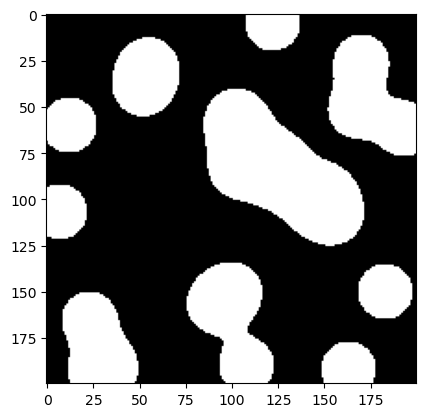

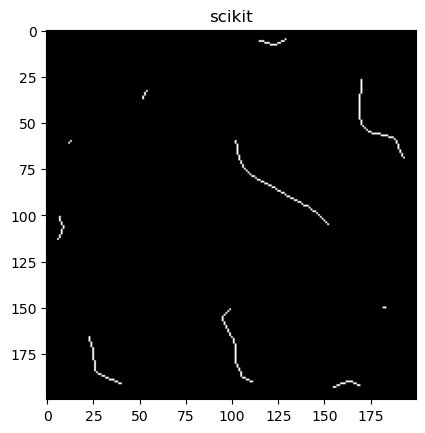

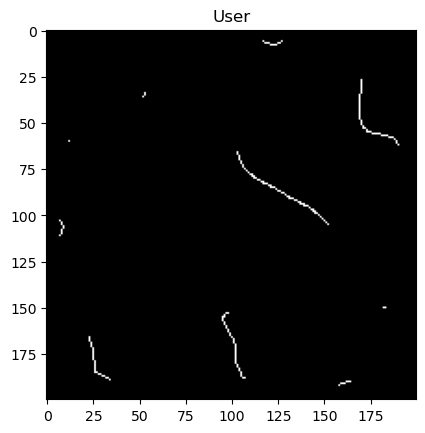

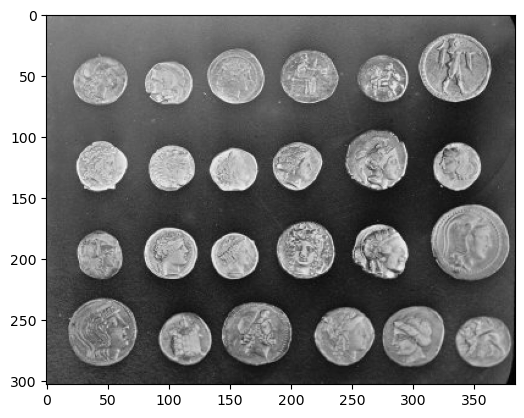

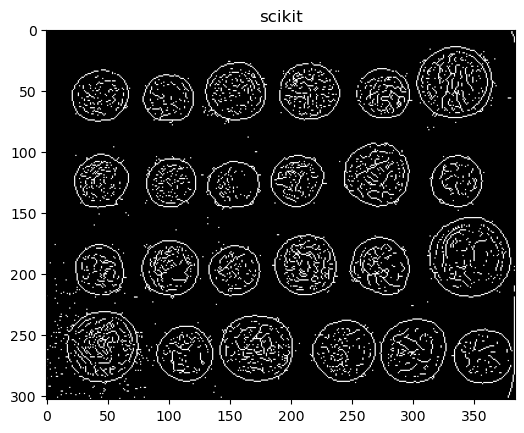

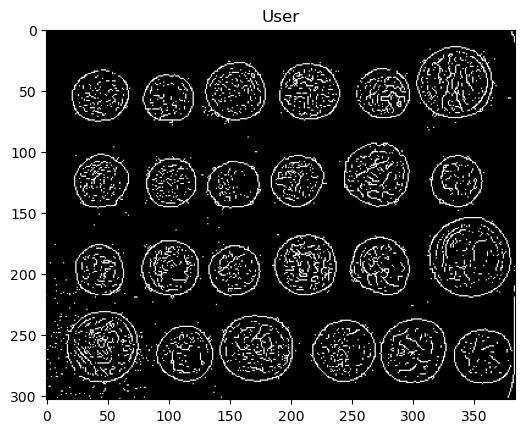

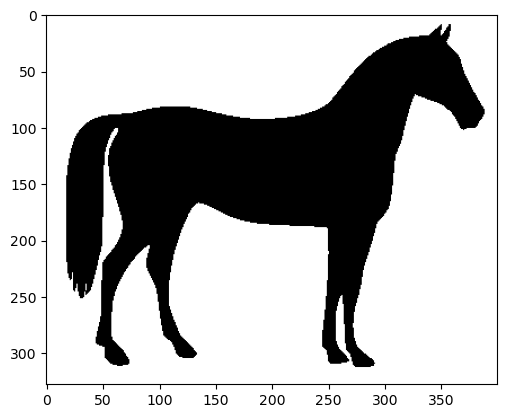

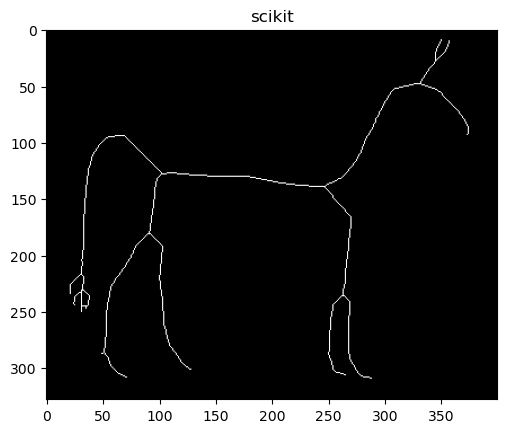

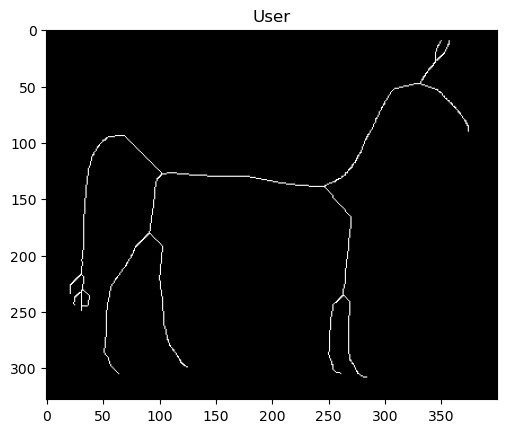

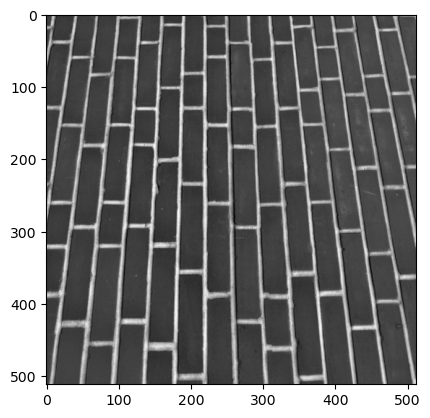

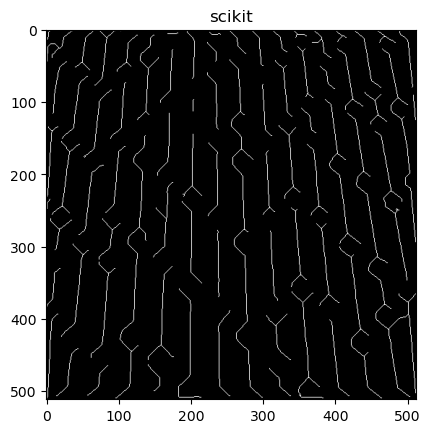

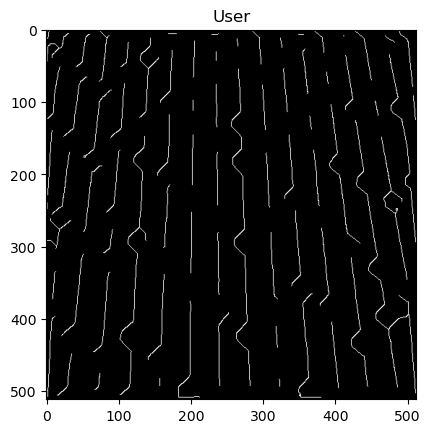

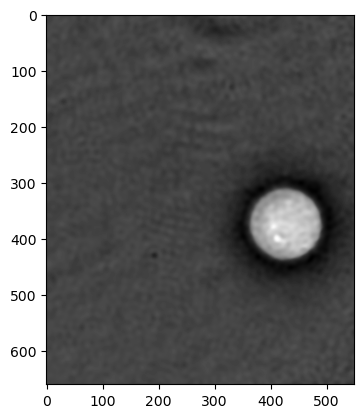

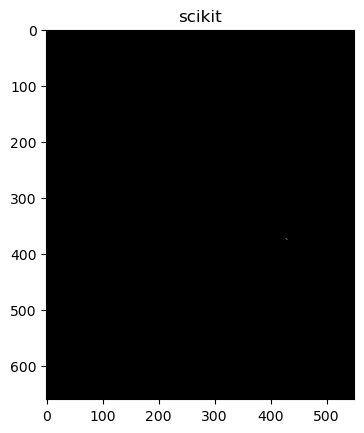

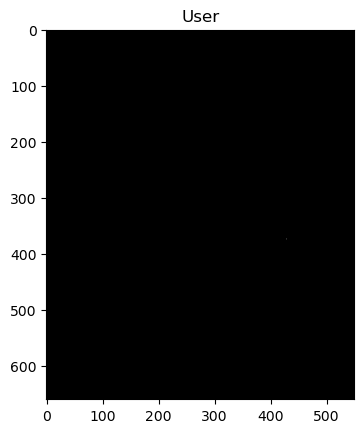

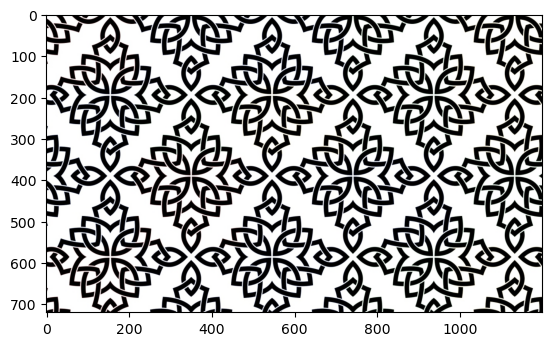

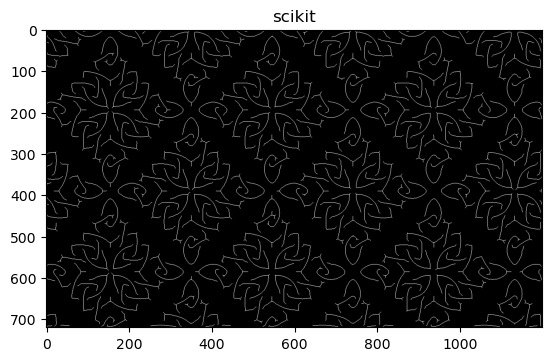

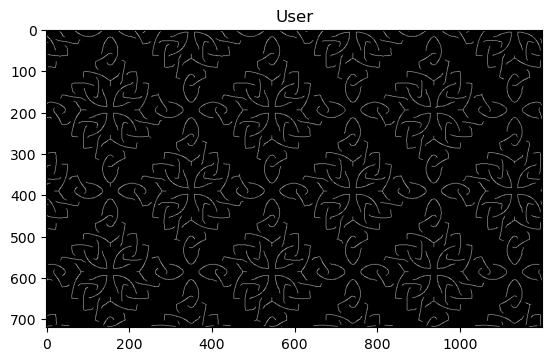

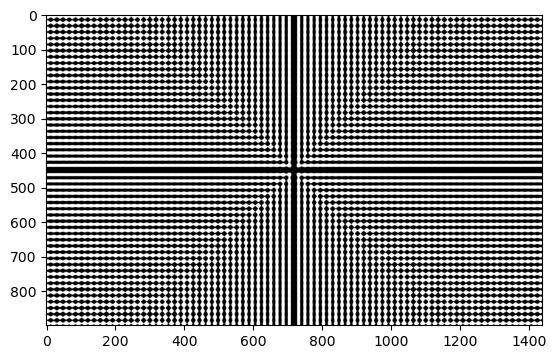

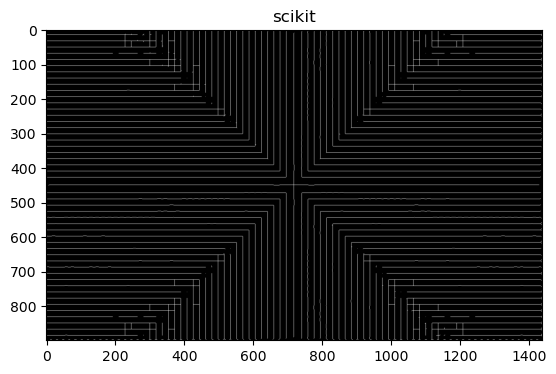

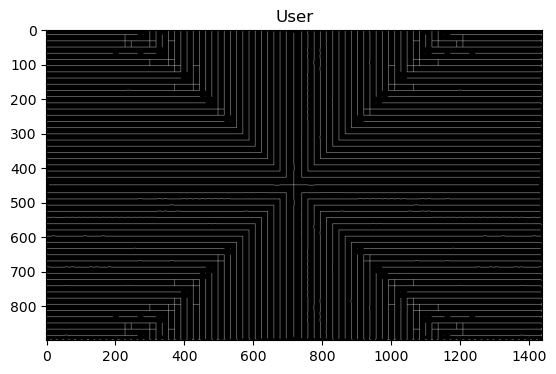

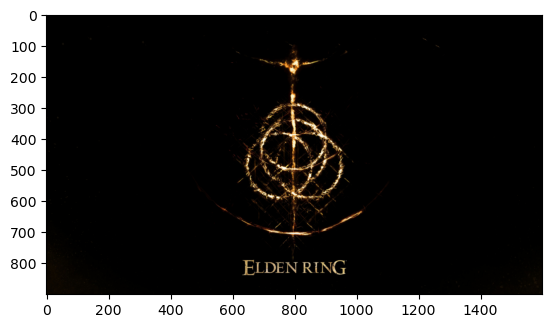

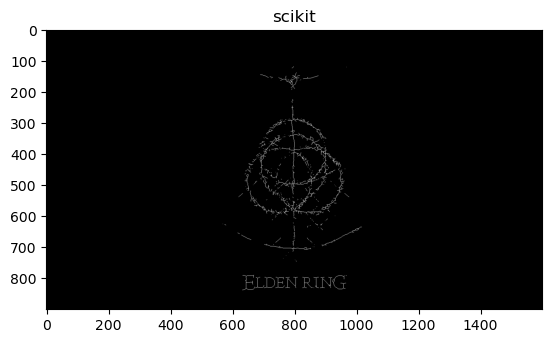

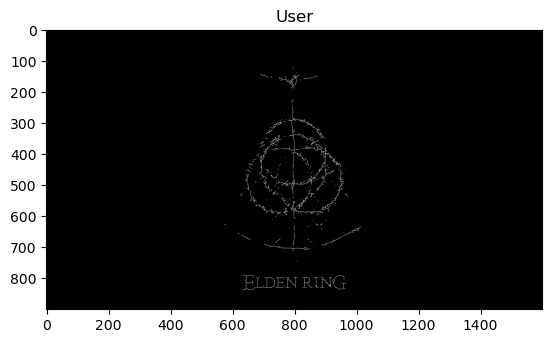

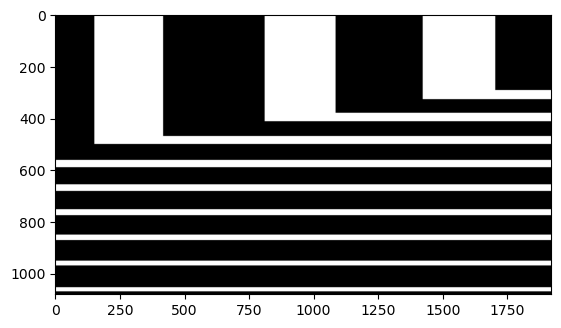

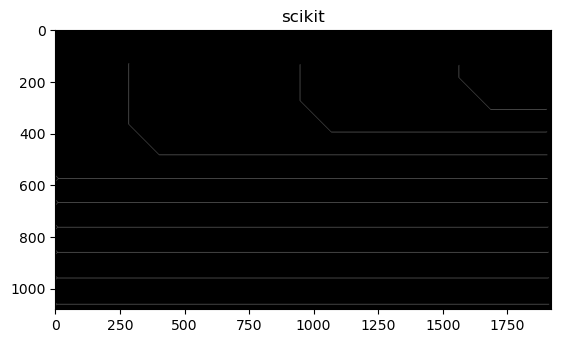

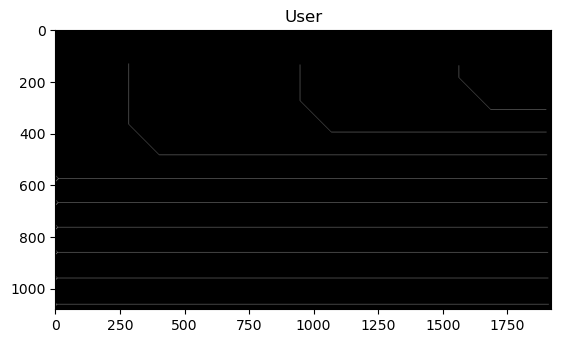

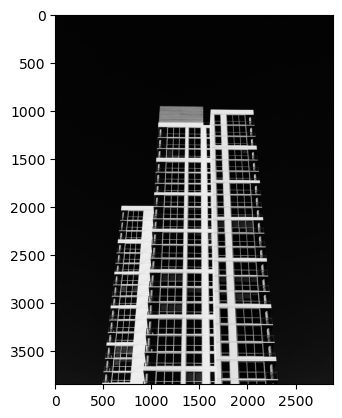

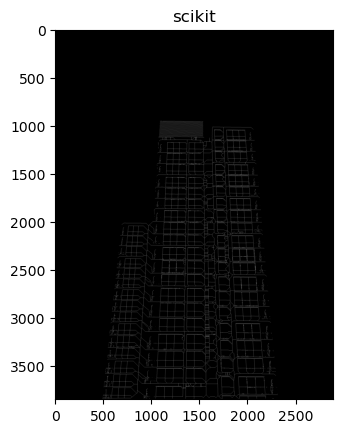

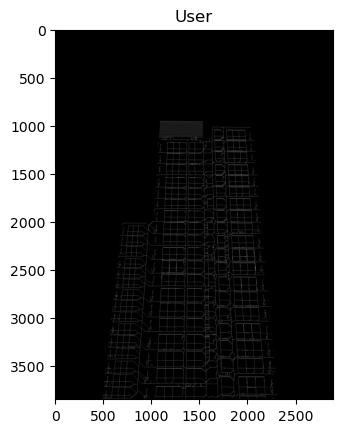

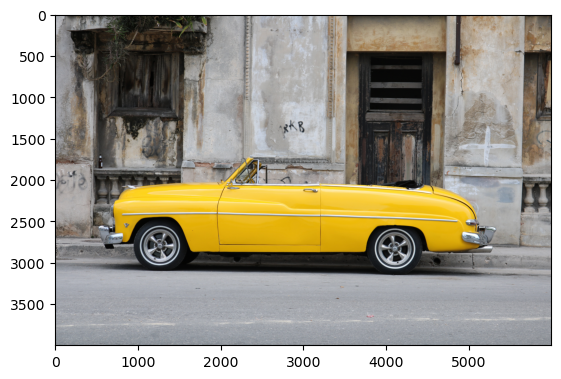

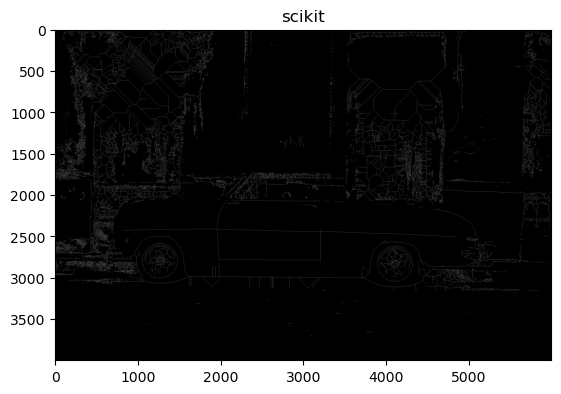

In [9]:
scikitTime = []
userFuncTime = []

blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, seed=1)


plt.imshow(blobs, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(blobs), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()

scikitTime.append(t2-t1)

t1 = time.time()
plt.imshow(thinning(blobs), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)


coins = data.coins()
block_size = 11
local_thresh = threshold_local(coins, block_size, offset=11)
binary_local = coins > local_thresh

plt.imshow(coins, cmap='gray')
plt.show()

t1 = time.time()
plt.imshow(skeletonize(invert(binary_local)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)

t1 = time.time()
plt.imshow(thinning(invert(binary_local)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)


horseImg = data.horse()
plt.imshow(horseImg, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(invert(horseImg)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(horseImg)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)

brickWall = data.brick()
thresh = threshold_otsu(brickWall)
binary = brickWall > thresh
plt.imshow(brickWall, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)

cell = data.cell()
thresh = threshold_otsu(cell)
binary = cell > thresh
plt.imshow(cell, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(binary), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(binary), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)

img = mpimg.imread(r"D:\projekti\tst4720p.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
plt.imshow(img, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)


img = mpimg.imread(r"D:\projekti\tst5.jpg")
thresh = threshold_otsu(img)
binary = img > thresh
plt.imshow(img, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)

t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)


img = mpimg.imread(r"D:\projekti\tst6.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
plt.imshow(img, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(binary), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)

t1 = time.time()
plt.imshow(thinning(binary), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)


img = mpimg.imread(r"D:\projekti\test(1080p).jpg")
thresh = threshold_otsu(img)
binary = img > thresh
plt.imshow(img, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(binary), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(binary), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)


img = mpimg.imread(r"D:\projekti\test3.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
plt.imshow(img, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(binary), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)

t1 = time.time()
plt.imshow(thinning(binary), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime.append(t2-t1)


img = mpimg.imread(r"D:\projekti\test2.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
plt.imshow(img, cmap='gray')
plt.show()
t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime.append(t2-t1)


[4.824960231781006, 3.0418224334716797, 39.916308641433716, 41.74555039405823, 82.72932314872742, 51.26936721801758, 104.97051811218262, 58.16325116157532]
[0.1478440761566162, 0.01798105239868164, 0.06992745399475098, 0.042958736419677734, 0.08591151237487793, 0.05993962287902832, 0.11188340187072754, 0.04195857048034668]
[40000, 116352, 131200, 262144, 363000, 864000, 1296000, 1440000]


Text(0.5, 1.0, 'Ovisnost vremena izvođenja o broju piksela-user')

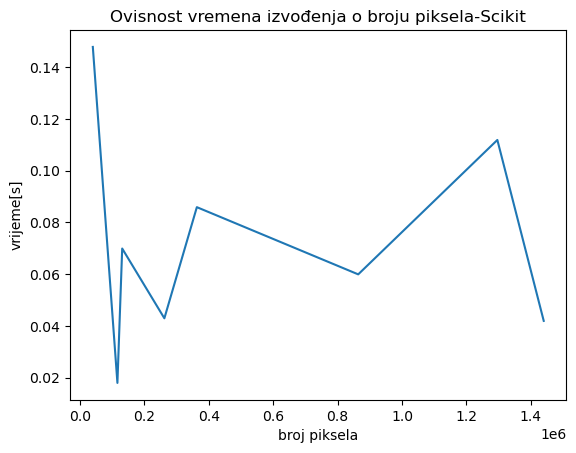

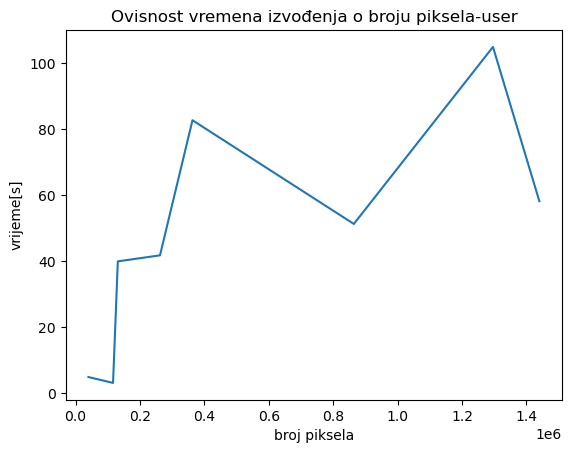

In [47]:
print(userFuncTime)
print(scikitTime)
rez=[]
rez.append(blobs.shape[0]*blobs.shape[1])
rez.append(coins.shape[0]*coins.shape[1])
rez.append(horseImg.shape[0]*horseImg.shape[1])
rez.append(brickWall.shape[0]*brickWall.shape[1])
rez.append(cell.shape[0]*cell.shape[1])
rez.append(1200*720)
rez.append(1440*900)
rez.append(1600*900)
print(rez)

plt.plot(rez, scikitTime)
plt.xlabel('broj piksela')
plt.ylabel('vrijeme[s]')
plt.title('Ovisnost vremena izvođenja o broju piksela-Scikit')

plt.figure()
plt.plot(rez, userFuncTime)
plt.xlabel('broj piksela')
plt.ylabel('vrijeme[s]')
plt.title('Ovisnost vremena izvođenja o broju piksela-user')

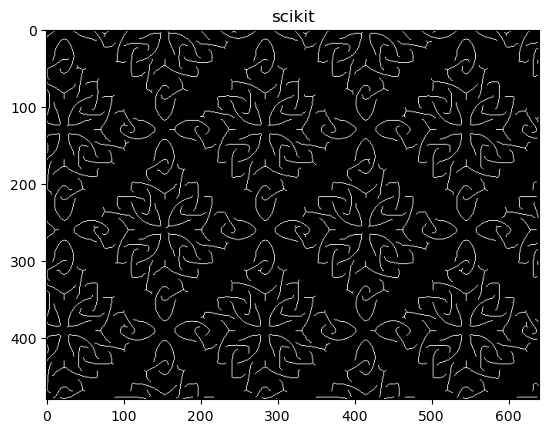

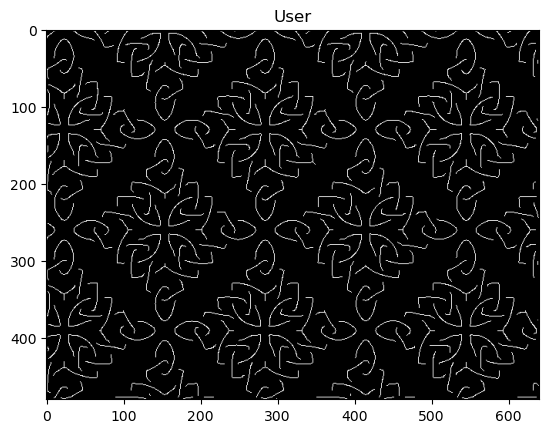

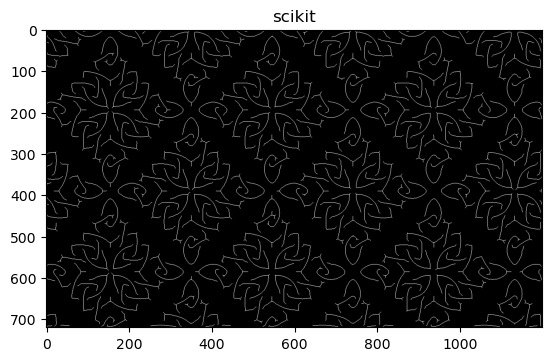

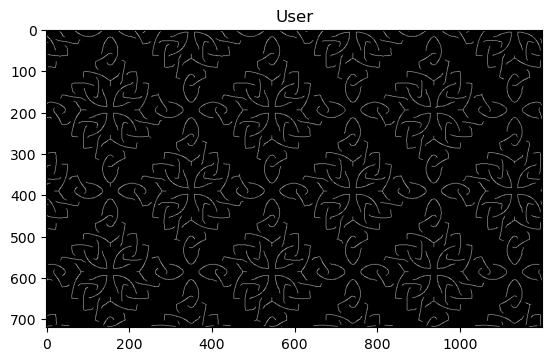

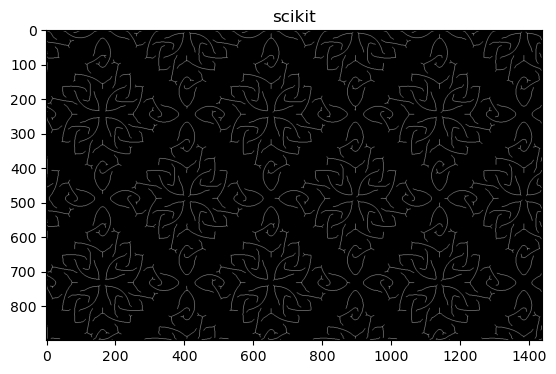

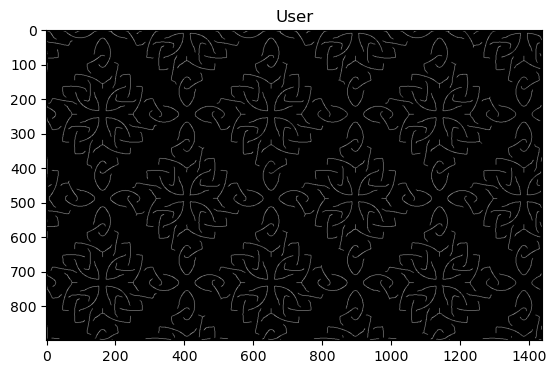

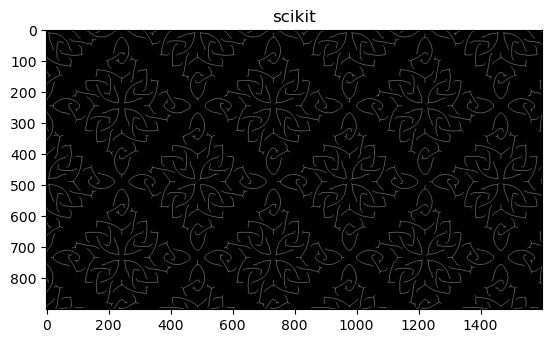

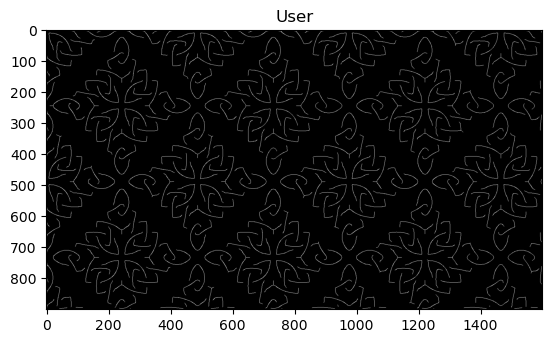

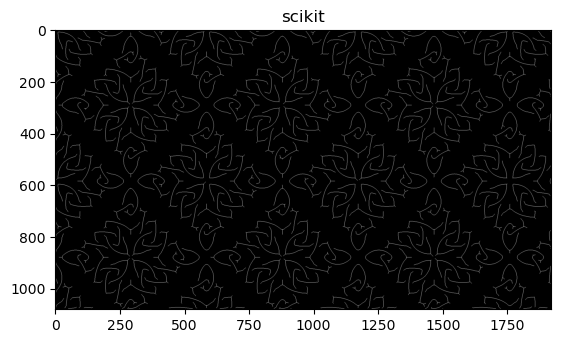

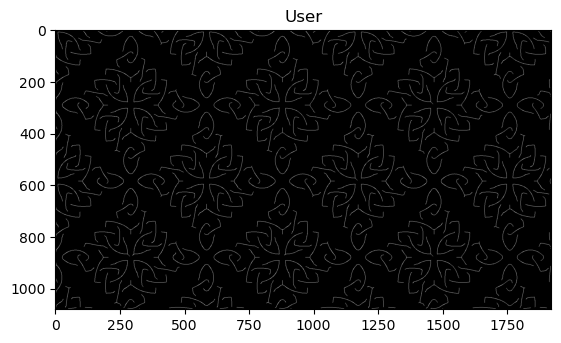

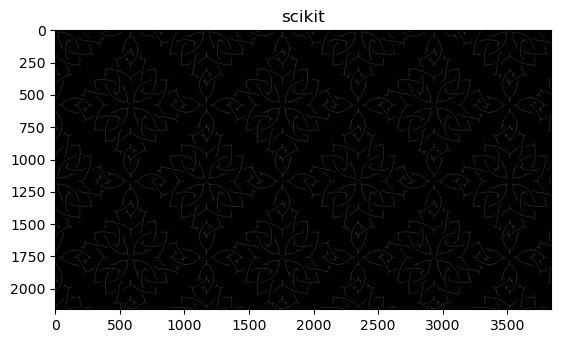

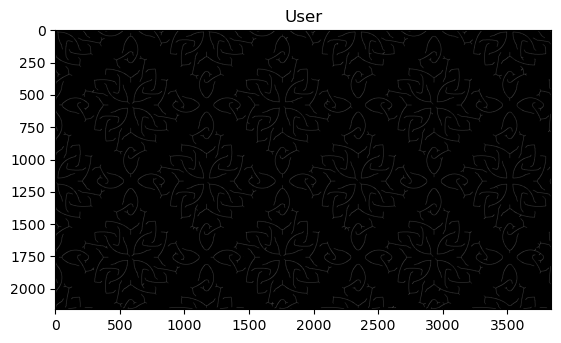

In [50]:
scikitTime2 = []
userFuncTime2 = []
rez2 = []

img = mpimg.imread(r"D:\projekti\tst4420p.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
rez2.append(img.shape[0]*img.shape[1])

t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime2.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime2.append(t2-t1)


img = mpimg.imread(r"D:\projekti\tst4720p.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
rez2.append(img.shape[0]*img.shape[1])

t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime2.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime2.append(t2-t1)

img = mpimg.imread(r"D:\projekti\tst4low.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
rez2.append(img.shape[0]*img.shape[1])

t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime2.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime2.append(t2-t1)


img = mpimg.imread(r"D:\projekti\tst4.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
rez2.append(img.shape[0]*img.shape[1])

t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime2.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime2.append(t2-t1)

img = mpimg.imread(r"D:\projekti\tst4HD.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
rez2.append(img.shape[0]*img.shape[1])

t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime2.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime2.append(t2-t1)

img = mpimg.imread(r"D:\projekti\tst4UHD.jpg")
gray_img  = rgb2gray(img)
thresh = threshold_otsu(gray_img)
binary = gray_img > thresh
rez2.append(img.shape[0]*img.shape[1])

t1 = time.time()
plt.imshow(skeletonize(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('scikit')
plt.show()
scikitTime2.append(t2-t1)


t1 = time.time()
plt.imshow(thinning(invert(binary)), cmap='gray')
t2 = time.time()
plt.title('User')
plt.show()
userFuncTime2.append(t2-t1)
